In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [241]:
data = pd.read_csv('bank_data_marketing.csv')

In [242]:
data

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,Campaign-2,999-Days,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,Campaign-4,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191
2,25,services,married,high.school,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,Campaign-3,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,Campaign-1,999-Days,0,nonexistent,-0.1,93.2,-42.0,no,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.959,5228.1
4116,27,student,single,high.school,no,no,no,Campaign-2,999-Days,1,failure,-1.8,92.893,-46.2,no,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.966,5228.1


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   campaign        4116 non-null   object 
 8   pdays           4119 non-null   object 
 9   previous        4119 non-null   object 
 10  poutcome        4117 non-null   object 
 11  emp.var.rate    4119 non-null   float64
 12  cons.price.idx  4119 non-null   object 
 13  cons.conf.idx   4119 non-null   float64
 14  pred_subs       4118 non-null   object 
 15  euribor3m       4119 non-null   object 
 16  nr.employed     4117 non-null   object 
dtypes: float64(2), int64(1), object(1

In [151]:
data.isnull().sum()

age               0
job               2
marital           1
education         1
default           0
housing           0
loan              0
campaign          3
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
pred_subs         1
euribor3m         0
nr.employed       2
dtype: int64

In [182]:
data.dropna(axis = 0, inplace = True)

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [12]:
data['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 35, 36, 29, 27, 44, 46, 50, 55, 40, 28,
       34, 33, 51, 48, 31, 20, 76, 45, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [13]:
data['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [14]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [15]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree', 'basic.6y',
       'basic.4y', 'professional.course', 'unknown', '"', '23%',
       'illiterate'], dtype=object)

In [16]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [17]:
data['housing'].unique()

array(['yes', 'no', 'unknown', '$', 'Appolo'], dtype=object)

In [18]:
data['loan'].unique()

array(['no', 'unknown', 'yes', '$%', '$', '&'], dtype=object)

In [19]:
data['campaign'].unique()

array(['Campaign-2', 'Campaign-4', 'Campaign-1', 'Campaign-3',
       'Campaign-6', 'Campaign-7', 'Campaign-27', 'Campaign-5',
       'Campaign-12', 'Campaign-14', 'Campaign-10', 'Campaign-11',
       'Campaign-13', 'Campaign-8', 'Campaign-9', 'Campaign-15',
       'Campaign-16', 'Campaign-18', 'Campaign-17', 'Campaign-22',
       'Campaign-19', 'Campaign-23', 'Campaign-24', 'Campaign-35',
       'Campaign-29'], dtype=object)

In [20]:
data['pdays'].unique()

array(['999-Days', '12-Days', '3-Days', '6-Days', '5-Days', '2-Days',
       '@-Days', '10-Days', '11-Days', '7-Days', '1-Days', '18-Days',
       '4-Days', '15-Days', '0-Days', 'Bank No responce-Days', '16-Days',
       '9-Days', '19-Days', '17-Days', '13-Days', '21-Days', '14-Days'],
      dtype=object)

In [21]:
data['previous'].unique()

array(['0', '2', '1', '3', '5', '4', '6', '\\'], dtype=object)

In [22]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success', '&&', '*', '||', '%', 'Q998'],
      dtype=object)

In [23]:
data['emp.var.rate'].unique()

array([-1.8,  1.1,  1.4, -0.1, -1.1, -2.9, -1.7, -3.4, -3. , -0.2])

In [24]:
data['cons.price.idx'].unique()

array(['92.893', '93.994', '94.465', '93.2', '94.199', '93.918', '93.369',
       '93.444', '92.843', '92.963', '94.601', '94.027', '92.379',
       '92.431', '93.749', '93.075', '94.055', '92.469', '94.767',
       '92.201', '92.649', '94.215', '()', '&$', '93.876', '93.798',
       '@31', '92.713', '92.756', 'xccui'], dtype=object)

In [25]:
data['cons.conf.idx'].unique()

array([-46.2, -36.4, -41.8, -42. , -37.5, -42.7, -34.8, -36.1, -50. ,
       -40.8, -49.5, -38.3, -29.8, -26.9, -34.6, -47.1, -39.8, -33.6,
       -50.8, -31.4, -30.1, -40.3, -40. , -40.4, -33. , -45.9])

In [27]:
data['pred_subs'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
data['euribor3m'].unique()

array(['1.313', '4.855', '4.962', '4.959', '4.191', '0.884', '0.879',
       '4.958', '4.968', '4.859', '4.963', '4.957', '4.961', '0.639',
       '4.967', '4.965', '4.864', '4.856', '1.299', '4.86', '1.687',
       '4.865', '1.268', '4.12', '1.334', '0.977', '1.344', '0.899',
       '1.327', '4.592', '4.97', '1.26', '4.966', '0.77', '4.866',
       '4.964', '4.857', '0.886', '0.739', '0.654', '1.405', '1.281',
       '4.96', '0.754', '1.291', '1.365', '4.076', '4.153', '1.266',
       '1.41', '1.25', '4.858', '0.702', '1.029', '1.085', '1.392',
       '1.262', '1.05', '0.851', '0.716', '0.877', '0.835', '1.048',
       '0.904', '1.028', '0.637', '1.244', '1.354', '4.021', '1.453',
       '0.715', '1.778', '0.773', '1.035', '0.9', '0.898', '0.742',
       '0.861', '1.264', '0.704', '1.27', '0.695', '1.039', '1.531',
       '0.883', '0.748', '0.809', '4.794', '1.479', '0.697', '0.959',
       '1.032', '0.896', '0.827', '1.483', '0.905', '1.466', '0.714',
       '0.644', '0.849', '0.881'

In [29]:
data['nr.employed'].unique()

array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', '()', '|cb', '5023.5', 'Bank', '5176.3'],
      dtype=object)

In [30]:
data['campaign']

0       Campaign-2
1       Campaign-4
2       Campaign-1
3       Campaign-3
4       Campaign-1
           ...    
4114    Campaign-1
4115    Campaign-1
4116    Campaign-2
4117    Campaign-1
4118    Campaign-1
Name: campaign, Length: 4108, dtype: object

In [243]:
def campaign(a):
    return int(a.split('-')[1])

In [244]:
def pdays(b):
    return int(b.split('-')[0])

In [247]:
data['campaign'].unique()

array(['Campaign-2', 'Campaign-4', 'Campaign-1', 'Campaign-3',
       'Campaign-6', 'Campaign-7', 'Campaign-27', 'Campaign-5',
       'Campaign-12', 'Campaign-14', 'Campaign-10', nan, 'Campaign-8',
       'Campaign-11', 'Campaign-13', 'Campaign-9', 'Campaign-15',
       'Campaign-16', 'Campaign-18', 'Campaign-17', 'Campaign-22',
       'Campaign-19', 'Campaign-23', 'Campaign-24', 'Campaign-35',
       'Campaign-29'], dtype=object)

In [251]:
data['campaign'] = data['campaign'].apply(lambda a: campaign(a))

In [212]:
data['pdays'] = data['pdays'].apply(lambda b: pdays(b))

In [82]:
data['pdays'] 

0       999
1       999
2       999
3       999
4       999
       ... 
4114    999
4115    999
4116    999
4117    999
4118    999
Name: pdays, Length: 4096, dtype: int64

## Q2. Data preprocessing - data cleaning
### a. Handle the missing values and noise values
### b. Treat the outlier
### c. Apply the scaling on numerical columns
### d. Apply the encoding on categorical columns

In [249]:
data.dropna(axis = 0, inplace = True)

In [250]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
pred_subs         0
euribor3m         0
nr.employed       0
dtype: int64

In [34]:
data['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 35, 36, 29, 27, 44, 46, 50, 55, 40, 28,
       34, 33, 51, 48, 31, 20, 76, 45, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [35]:
data['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [44]:
data[data['job'] == 'unknown']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
229,44,unknown,single,basic.9y,unknown,yes,no,Campaign-3,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.96,5228.1
239,55,unknown,married,basic.4y,no,no,yes,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.962,5228.1
344,51,unknown,married,unknown,unknown,yes,no,Campaign-5,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.963,5228.1
354,52,unknown,married,basic.6y,no,no,no,Campaign-4,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.864,5191
467,60,unknown,married,university.degree,no,no,yes,Campaign-1,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.86,5191
480,53,unknown,married,unknown,unknown,no,no,Campaign-4,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.965,5228.1
499,24,unknown,single,university.degree,no,yes,yes,Campaign-1,999-Days,2,failure,-2.9,92.963,-40.8,no,1.262,5076.2
501,59,unknown,married,unknown,unknown,no,no,Campaign-1,999-Days,0,nonexistent,1.4,94.465,-41.8,yes,4.866,5228.1
528,43,unknown,married,high.school,unknown,yes,yes,Campaign-2,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.857,5191
615,41,unknown,single,unknown,unknown,yes,no,Campaign-2,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.967,5228.1


In [45]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [46]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [47]:
data[data['marital'] == 'unknown']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
272,57,retired,unknown,basic.4y,no,no,no,Campaign-1,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.857,5191
882,35,self-employed,unknown,university.degree,no,no,no,Campaign-1,999-Days,0,nonexistent,-0.1,93.2,-42.0,no,4.076,5195.8
1049,37,unemployed,unknown,university.degree,no,no,no,Campaign-1,999-Days,0,nonexistent,-2.9,92.963,-40.8,no,1.262,5076.2
1289,59,retired,unknown,university.degree,unknown,no,no,Campaign-1,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.857,5191
1644,36,admin.,unknown,university.degree,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,yes,4.965,5228.1
1857,29,technician,unknown,high.school,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.965,5228.1
2532,56,blue-collar,unknown,basic.4y,no,no,no,Campaign-1,999-Days,0,nonexistent,-1.8,93.075,-47.1,no,1.405,5099.1
2547,34,services,unknown,high.school,no,yes,yes,Campaign-2,999-Days,1,failure,-1.8,92.893,-46.2,no,1.344,5099.1
2798,34,admin.,unknown,university.degree,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1
3000,31,admin.,unknown,high.school,no,no,no,Campaign-8,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.858,5191


In [48]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree', 'basic.6y',
       'basic.4y', 'professional.course', 'unknown', '"', '23%',
       'illiterate'], dtype=object)

In [49]:
data[data['education'] == '"']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
58,27,admin.,married,"""",no,no,no,Campaign-5,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.857,5191


In [186]:
data.drop([58], axis = 0, inplace = True)

In [51]:
data[data['education'] == '"']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [187]:
data[data['education'] ==  '23%']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
356,27,services,married,23%,no,no,no,3,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.963,5228.1


In [188]:
data.drop([356], axis = 0, inplace = True)

In [54]:
data[data['education'] ==  '23%']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [56]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [58]:
data['housing'].unique()

array(['yes', 'no', 'unknown', '$', 'Appolo'], dtype=object)

In [59]:
data[data['housing'] == '$']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
597,39,technician,single,university.degree,no,$,yes,Campaign-6,999-Days,1,failure,-1.8,93.075,-47.1,no,1.405,5099.1
756,48,admin.,married,university.degree,unknown,$,no,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.965,5228.1
883,28,services,married,high.school,no,$,no,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.962,5228.1


In [189]:
data.drop([597], axis = 0, inplace = True)
data.drop([756], axis = 0, inplace = True)
data.drop([883], axis = 0, inplace = True)

In [61]:
data[data['housing'] == '$']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [62]:
data[data['housing'] == 'Appolo']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1688,34,technician,single,professional.course,no,Appolo,yes,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.97,5228.1


In [63]:
data['loan'].unique()

array(['no', 'unknown', 'yes', '$%', '$', '&'], dtype=object)

In [66]:
data[data['loan'] == '&']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
672,59,retired,married,university.degree,no,yes,&,Campaign-18,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.962,5228.1


In [190]:
data.drop([173], axis = 0, inplace = True)
data.drop([510], axis = 0, inplace = True)
data.drop([961], axis = 0, inplace = True)
data.drop([672], axis = 0, inplace = True)


In [68]:
data[data['loan'] == '&']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [73]:
data['campaign'].unique()

array([ 2,  4,  1,  3,  6,  7, 27,  5, 12, 14, 10, 11, 13,  8,  9, 15, 16,
       17, 22, 19, 23, 24, 35, 29], dtype=int64)

In [74]:
data['pdays'].unique()

array(['999-Days', '12-Days', '3-Days', '6-Days', '5-Days', '2-Days',
       '@-Days', '10-Days', '11-Days', '7-Days', '1-Days', '18-Days',
       '4-Days', '15-Days', '0-Days', 'Bank No responce-Days', '16-Days',
       '9-Days', '19-Days', '17-Days', '13-Days', '21-Days', '14-Days'],
      dtype=object)

In [84]:
data[data['pdays'] == 999]

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191
2,25,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999,0,nonexistent,-0.1,93.2,-42.0,no,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,1,999,0,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,93.918,-42.7,no,4.959,5228.1
4116,27,student,single,high.school,no,no,no,2,999,1,failure,-1.8,92.893,-46.2,no,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,1,999,0,nonexistent,1.4,93.444,-36.1,no,4.966,5228.1


In [191]:
data.drop([116], axis =0, inplace = True)

In [192]:
data.drop([1546], axis =0, inplace = True)

In [83]:
data['pdays'].unique()

array([999,  12,   3,   6,   5,   2,  10,  11,   7,   1,  18,   4,  15,
         0,  16,   9,  19,  17,  13,  21,  14], dtype=int64)

In [85]:
data['previous'].unique()

array(['0', '2', '1', '3', '5', '4', '6', '\\'], dtype=object)

In [86]:
data[data['previous'] == '\\']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1126,34,blue-collar,married,basic.4y,no,yes,no,1,999,\,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1


In [163]:
data.drop([1126], axis =0, inplace = True)

In [89]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success', '&&', '*', '||', '%', 'Q998'],
      dtype=object)

In [108]:
data[data['poutcome'] == '&&']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [110]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [193]:
data.drop([994], axis =0, inplace = True)
data.drop([962], axis =0, inplace = True)
data.drop([311], axis =0, inplace = True)


In [111]:
data['emp.var.rate'].unique()

array([-1.8,  1.1,  1.4, -0.1, -1.1, -2.9, -1.7, -3.4, -3. , -0.2])

In [113]:
data['cons.price.idx'].unique()

array(['92.893', '93.994', '94.465', '93.2', '94.199', '93.918', '93.369',
       '93.444', '92.843', '92.963', '94.601', '94.027', '92.379',
       '92.431', '93.749', '93.075', '94.055', '92.469', '94.767',
       '92.201', '94.215', '92.649', '()', '&$', '93.876', '93.798',
       '@31', '92.713', '92.756', 'xccui'], dtype=object)

In [120]:
data[data['cons.price.idx'] == 'xccui']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1911,47,technician,single,professional.course,no,yes,no,2,999,0,nonexistent,1.4,xccui,-42.7,no,4.962,5228.1


In [194]:
data.drop([260], axis =0, inplace = True)
data.drop([338], axis =0, inplace = True)
data.drop([509], axis =0, inplace = True)

In [195]:
data.drop([1911], axis =0, inplace = True)

In [122]:
data['cons.price.idx'].unique()

array(['92.893', '93.994', '94.465', '93.2', '94.199', '93.918', '93.369',
       '93.444', '92.843', '92.963', '94.601', '94.027', '92.379',
       '92.431', '93.749', '93.075', '94.055', '92.469', '94.767',
       '92.201', '94.215', '92.649', '93.876', '93.798', '92.713',
       '92.756'], dtype=object)

In [124]:
data['cons.conf.idx'].unique()

array([-46.2, -36.4, -41.8, -42. , -37.5, -42.7, -34.8, -36.1, -50. ,
       -40.8, -49.5, -38.3, -29.8, -26.9, -34.6, -47.1, -39.8, -33.6,
       -50.8, -31.4, -40.3, -30.1, -40. , -40.4, -33. , -45.9])

In [126]:
data['pred_subs'].unique()

array(['no', 'yes'], dtype=object)

In [129]:
data['nr.employed'].unique()

array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', '|cb', '5023.5', 'Bank', '5176.3'],
      dtype=object)

In [131]:
data[data['nr.employed'] == 'Bank']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1219,48,retired,married,basic.4y,unknown,yes,yes,17,999,0,nonexistent,1.4,93.918,-42.7,no,4.962,Bank


In [196]:
data.drop([312], axis =0, inplace = True)
data.drop([1219], axis =0, inplace = True)


In [133]:
data['nr.employed'].unique()

array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', '5023.5', '5176.3'], dtype=object)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             0 non-null      int64  
 1   job             0 non-null      object 
 2   marital         0 non-null      object 
 3   education       0 non-null      object 
 4   default         0 non-null      object 
 5   housing         0 non-null      object 
 6   loan            0 non-null      object 
 7   campaign        0 non-null      int64  
 8   pdays           0 non-null      int64  
 9   previous        0 non-null      object 
 10  poutcome        0 non-null      object 
 11  emp.var.rate    0 non-null      float64
 12  cons.price.idx  0 non-null      object 
 13  cons.conf.idx   0 non-null      float64
 14  pred_subs       0 non-null      object 
 15  euribor3m       0 non-null      object 
 16  nr.employed     0 non-null      object 
dtypes: float64(2), int64(3), object(12)
memory usag

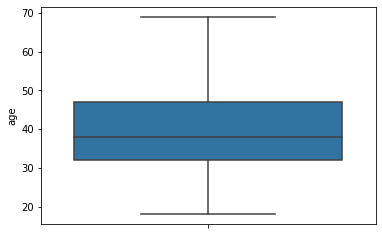

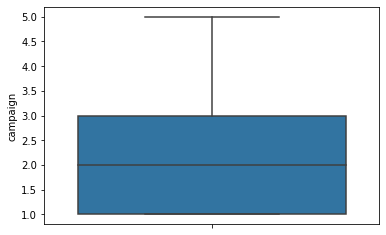

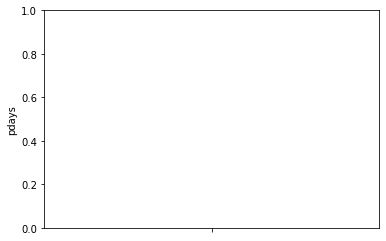

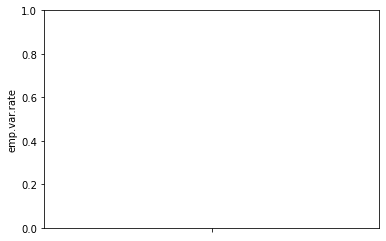

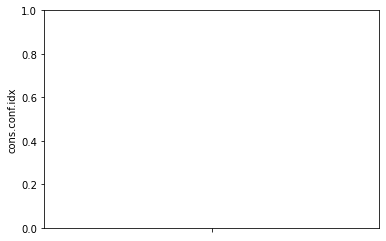

In [140]:
col=['age','campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx']
for c in col:
  percentile25=data[c].quantile(0.25)
  percentile75=data[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  data=data[(data[c]<upper_limit) & (data[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=data)

In [143]:
data['pdays'].unique()

array([], dtype=int64)

In [168]:
data

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999-Days,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191
2,25,services,married,high.school,no,yes,no,1,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999-Days,0,nonexistent,-0.1,93.2,-42.0,no,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.959,5228.1
4116,27,student,single,high.school,no,no,no,2,999-Days,1,failure,-1.8,92.893,-46.2,no,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.966,5228.1


In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
le = LabelEncoder()

In [200]:
data['pred_subs']=le.fit_transform(data['pred_subs'])


In [ ]:
data['pred_subs']=le.fit_transform(data['pred_subs'])

In [213]:
data

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,0,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999,0,nonexistent,1.1,93.994,-36.4,0,4.855,5191
2,25,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,94.465,-41.8,0,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999,0,nonexistent,1.4,94.465,-41.8,0,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999,0,nonexistent,-0.1,93.2,-42.0,0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.959,5228.1
4116,27,student,single,high.school,no,no,no,2,999,1,failure,-1.8,92.893,-46.2,0,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,1,999,0,nonexistent,1.4,93.444,-36.1,0,4.966,5228.1


In [214]:
data.drop('age', axis = 1, inplace = True)

In [215]:
data.drop('job', axis = 1, inplace = True)
data.drop('marital', axis = 1, inplace = True)




In [216]:
data

,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,basic.9y,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,0,1.313,5099.1
1,high.school,no,no,no,4,999,0,nonexistent,1.1,93.994,-36.4,0,4.855,5191
2,high.school,no,yes,no,1,999,0,nonexistent,1.4,94.465,-41.8,0,4.962,5228.1
3,basic.9y,no,unknown,unknown,3,999,0,nonexistent,1.4,94.465,-41.8,0,4.959,5228.1
4,university.degree,no,yes,no,1,999,0,nonexistent,-0.1,93.2,-42.0,0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,basic.6y,no,yes,yes,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.958,5228.1
4115,high.school,no,yes,no,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.959,5228.1
4116,high.school,no,no,no,2,999,1,failure,-1.8,92.893,-46.2,0,1.354,5099.1
4117,high.school,no,no,no,1,999,0,nonexistent,1.4,93.444,-36.1,0,4.966,5228.1


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 4118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   education       4088 non-null   object 
 1   default         4088 non-null   object 
 2   housing         4088 non-null   object 
 3   loan            4088 non-null   object 
 4   campaign        4088 non-null   int64  
 5   pdays           4088 non-null   int64  
 6   previous        4088 non-null   object 
 7   poutcome        4088 non-null   object 
 8   emp.var.rate    4088 non-null   float64
 9   cons.price.idx  4088 non-null   object 
 10  cons.conf.idx   4088 non-null   float64
 11  pred_subs       4088 non-null   int32  
 12  euribor3m       4088 non-null   object 
 13  nr.employed     4088 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(9)
memory usage: 592.1+ KB


In [227]:
x = data[['campaign', 'pdays', 'emp.var.rate',
       'cons.conf.idx']].values
y = data['pred_subs'].values

In [228]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [230]:
sc=StandardScaler()

In [231]:
X_train=sc.fit_transform(X_train)

In [232]:
X_test=sc.transform(X_test)

In [233]:
reg=LogisticRegression()

In [234]:
reg.fit(X_train,Y_train)

LogisticRegression()

In [235]:
Y_pred=reg.predict(X_test)

In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[1072,   18],
       [ 107,   30]], dtype=int64)

<AxesSubplot:>

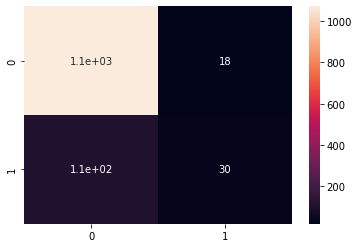

In [237]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True)

In [238]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8981255093724532